# Diabetes Hospitalizations

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)

### Location of Dataset:

https://data.world/uci/diabetes-130-us-hospitals-for-years-1999-2008

### Article for which data was collected originally:
https://www.hindawi.com/journals/bmri/2014/781670/

## Import Data and Cleaning

In [8]:
df = pd.read_csv('https://query.data.world/s/fzhdybgova7pqh6amwfzrnhumdc26t')

Need to remove time-series elements from when the same patient visited several times. Kept the first entry and removed all others.

In [ ]:
df.drop_duplicates(subset='patient_nbr', inplace=True) # 101,766 to 71,518 observations

Weight, Payer Code, and Medical Specialty were missing >50% of values.

In [12]:
df.drop(['encounter_id','patient_nbr','weight', 'payer_code', 'medical_specialty'], axis=1, inplace=True)

Changed target variable to 0-2 for classes (No readmit, less than 30 days, more than 30 days).

In [14]:
df.readmitted.replace({'NO': 0, '<30': 1, '>30': 2}, inplace=True)

Parsing the ICD-9 medical billing codes, in order to grab just 250.xx coding diabetes.

In [15]:
df = df[pd.to_numeric(df['diag_1'], errors='coerce').notnull()] # Select non-null values after changing values to
df = df[pd.to_numeric(df['diag_2'], errors='coerce').notnull()] # numeric (removing V27/V57 entries and ?)
df = df[pd.to_numeric(df['diag_3'], errors='coerce').notnull()] #

df.diag_1 = df.diag_1.astype('float64') # Can now recast from Object to Float64 dtypes (want float to preserve
df.diag_2 = df.diag_2.astype('float64') # ICD-9 decimals as part of the billing code)
df.diag_3 = df.diag_3.astype('float64') #

In [17]:
df.shape

(64520, 45)

## EDA

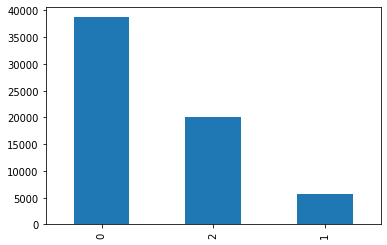

In [18]:
df.readmitted.value_counts().plot(kind='bar')

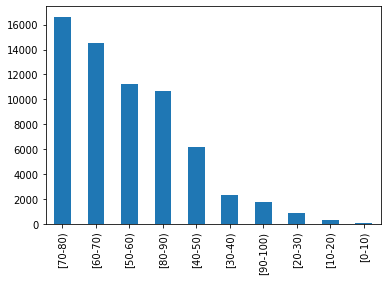

In [19]:
df.age.value_counts().plot(kind='bar')

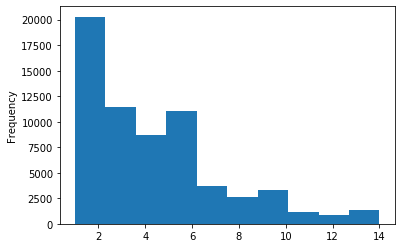

In [20]:
df.time_in_hospital.plot(kind='hist')